[Dataset](https://github.com/JeffSackmann/tennis_atp)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Directory and version specifications

Se definiarán variables globales como los directorios desde donde se leen los datos, directorios donde se guardan los resultados y el timestamp para guardar los archivos generados de cada ejecución indiviudal.

In [2]:
from datetime import datetime

MODEL_TIMESTAMP = datetime.now().strftime("%Y-%m-%d__%H-%M-%S")

DATA_PATH = 'data/'

CLASSIFICATION_REPORTS_PATH = 'classification_reports/'
CONFUSION_MATRIX_PATH = 'confusion_matrix/'
TREE_PATH = 'tree/'

# Resolución de imágenes
resolution = 300

# Download and Store Data

Se crea un método para descargar todos los datos de partidos pertenecientes al siguiente repositorio de [Github JeffSackmann/tennis_atp](https://github.com/JeffSackmann/tennis_atp) y posterior guardado de los csv.

In [3]:
# for index in range(0,22):
#     index_str = str(index)

#     print(index_str)
    
#     if len(index_str) == 1:
#         index_str = '0' + index_str

#     print(index_str)

#     url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_20{}.csv".format(index_str)
#     print(url)

#     FILE_NAME = "atp_matches_20{}.csv".format(index_str)

#     df = pd.read_csv(url, index_col=0, parse_dates=[0])
#     df.to_csv(DATA_PATH + FILE_NAME)

# # data_frame = pd.read_csv(DATA_PATH + FILE_NAME)

# Load Data

Métod para cargar todos los datos de los partidos (desde el año 2000 hasta el 2022) en un único csv `atp`.

In [4]:
atp = pd.DataFrame()

years_index_20_22 = range(0,22)

for index in years_index_20_22:
    index_str = str(index)

    if len(index_str) == 1:
        index_str = '0' + index_str

    FILE_NAME = "atp_matches_20{}.csv".format(index_str)

    data_frame_iter = pd.read_csv(DATA_PATH + FILE_NAME)
    atp = pd.concat([atp, data_frame_iter])

pd.set_option('display.max_columns', None)
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.771389,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.137577,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.558522,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.386037,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.390828,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.535250,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.909651,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.422998,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.381246,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.770021,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,4,200416,NaN,NaN,August Holmgren,R,NaN,DEN,23.394935,106397,NaN,NaN,Wishaya Trongcharoenchaikul,R,NaN,THA,26.433949,6-4 6-4,3,RR,90.0,3.0,3.0,52.0,29.0,22.0,16.0,10.0,0.0,1.0,8.0,2.0,79.0,45.0,30.0,14.0,10.0,10.0,13.0,905.0,16.0,767.0,27.0
2723,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,5,208937,NaN,NaN,Kasidit Samrej,R,NaN,THA,20.629706,134087,NaN,NaN,Johannes Ingildsen,R,NaN,DEN,24.202601,7-5 6-3,3,RR,88.0,6.0,6.0,58.0,28.0,21.0,13.0,11.0,3.0,7.0,5.0,8.0,76.0,43.0,24.0,13.0,10.0,5.0,11.0,1136.0,8.0,1546.0,2.0
2724,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,1,123795,NaN,NaN,Altug Celikbilek,U,NaN,TUR,25.015743,207669,NaN,NaN,Robert Strombachs,U,NaN,GER,21.995893,7-6(4) 6-4,3,RR,124.0,6.0,8.0,80.0,34.0,25.0,23.0,11.0,6.0,8.0,3.0,5.0,97.0,50.0,34.0,20.0,11.0,6.0,9.0,170.0,427.0,671.0,38.0
2725,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,2,117356,NaN,NaN,Cem Ilkel,R,185.0,TUR,26.064339,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,33.037645,6-4 6-1,3,RR,65.0,2.0,2.0,41.0,27.0,23.0,7.0,9.0,0.0,1.0,1.0,5.0,45.0,21.0,16.0,7.0,8.0,2.0,7.0,176.0,408.0,196.0,359.0


El objetivo de la sección de clasificación es averiguar el tipo de pista en la que se ha jugado el partido en función de una serie de variables, esto puede cobrar sentido ya que dependiendo de la superficie de la pista la velocidad con la que rebota la pelota es distinta, y por lo tanto puede influir en las variables del juego.

A continuación analizaremos los campos de importancia que se utilizarán en este proyecto de cara a los experimentos:


- `surface`: tipo de superficie de la pista en la que se ha jugado el partido, exiten cuatro tipos de pista:
    - Clay: Tierra batida.
    - Hard: Pista dura.
    - Carpet: Moqueta.
    - Grass: Césped.
- `minutes`: número de minutos transcurridos en el partido.
- `winner_ht, loser_ht`: altura del jugador ganador y del perdedor respectivamente.
- `w_ace, l_ace`: número de aces (saques directos) del ganador y del perdedor respectivamente.
- `w_svpt, l_svpt`: número de saques (service points) del ganador y del perdedor respectivamente.
- `w_1stWon, l_1stWon`: número de puntos ganados con primer saque (1st service) del ganador y del perdedor respectivamente.
- `w_2ndWon, l_2ndWon`: número de puntos ganados con segundo saque (2nd service) del ganador y del perdedor respectivamente.
- `w_bpSaved, l_bpSaved`: número puntos de rotura de servicio (break points) que ha neutralizado el ganador y el perdedor respectivamente.
- `w_bpFaced, l_bpFaced`: número puntos de rotura de servicio (break points) que han surfido el ganador y el perdedor respectivamente.
- `w_SvGms, l_SvGms`: número de juegos ganados con servicio propio del ganador y perdedor respectivamente.
- `winner_rank_points, loser_rank_points`: número de puntos en el ranking de la ATP del ganador y el perdedor.
- `round`: ronda en la que se ha jugado el partido dentro del torneo.



# Clean Dataset

Comenzaremos con la limpieza del dataset, donde obtendremos los campos mencionados en el apartado anterior:

In [5]:
COLUMNS_TO_GET = [
                  "surface",
                  "minutes",
                  "winner_ht", "loser_ht",
                  "w_ace", "l_ace",
                  "w_svpt", "l_svpt", # service points
                  "w_1stWon", "l_1stWon",
                  "w_2ndWon", "l_2ndWon",
                  "w_bpSaved", "l_bpSaved",
                  "w_bpFaced", "l_bpFaced",
                  "w_SvGms", "l_SvGms", # service games won
                  "winner_rank_points", "loser_rank_points",
                  "round",
                 ]

In [6]:
atp = atp.loc[:, atp.columns.isin(COLUMNS_TO_GET)]

atp = atp[atp['round'] != 'RR']
atp = atp[atp['round'] != 'ER']

atp = atp.dropna()

A continuación trataremos el campo `round` y lo transformaermos a numérico para que el árbol de decisión pueda tomar elecciones en función de la ronda del torneo a la que pertenece cada partido.

In [7]:
round_replace = {'R128': 128,
                  'R64': 64,
                  'R32': 32,
                  'R16': 16,
                  'QF': 4,
                  'SF': 2,
                  'F': 1
}

# Eliminamos las Round Robin (RR y ER)
atp['round'].replace(round_replace, inplace = True)

# Sesgos

En el dataset podemos observar que existe un sesgo en función del tipo de pista. Gran parte de los partidos se juegan en pista dura, que es menos costosa de mantener que las pistas de hierba y de moqueta. Este desbalanceo de datos afectaría notablemente a las predicciones del modelo ya que aprendería más de aquellas muestras más numerosas en el conjunto de datos que del resto de ellas. Por lo tanto tendría una tendencia a predecir la superficie de la pista como dura, reduciendo la efectividad de las clases menos numerosas en el dataset.

Por este motivo se realizará un downsampling a los datos, igualando el número de muestras a la clase menos numerosa en el conjunto de datos.

In [8]:
atp.surface.value_counts()

Hard      29064
Clay      17432
Grass      5844
Carpet     1402
Name: surface, dtype: int64

In [9]:
from sklearn.utils import resample

hard_data = atp[atp['surface'] == 'Hard']
clay_data = atp[atp['surface'] == 'Clay']
grass_data  = atp[atp['surface'] == 'Grass']
carpet_data = atp[atp['surface'] == 'Carpet']

X_hard_downsampled = resample(hard_data,
                                replace = True,
                                n_samples = len(carpet_data))

X_clay_downsampled = resample(clay_data,
                                 replace = True,
                                 n_samples = len(carpet_data))

X_grass_downsampled = resample(grass_data,
                                 replace = True,
                                 n_samples = len(carpet_data))

atp = pd.concat([X_hard_downsampled, X_clay_downsampled, X_grass_downsampled, carpet_data])

Una vez realizado el downsampling podemos comprobar que el número de muestras de cada clase es la misma, por lo tanto podemos comenzar a entrenar los modelos evitando el problema de desbalanceo.

In [10]:
atp.surface.value_counts()

Hard      1402
Clay      1402
Grass     1402
Carpet    1402
Name: surface, dtype: int64

In [11]:
labels = atp["surface"]
atp = atp.drop(columns=["surface"])

# Decision Tree with CV

A continuación definiremos un método para encontrar la profundidad óptima del árbol de decisión (con rangos de profundidad desde 2 hasta 20) utilizando la técnica de validación cruzada.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn import tree

splits = 10
cv = KFold(n_splits = splits, shuffle = True)

depths = range (2,20)
best_accuracy = 0

for depth in depths:
    mean_score = 0.0

    for train_index, test_index in cv.split(atp):

        x_train, y_train = atp.iloc[train_index], labels.iloc[train_index]
        x_test, y_test   = atp.iloc[test_index],  labels.iloc[test_index]

        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(x_train, y_train)

        accuracy = model.score(x_test,y_test)

        mean_score = mean_score + accuracy
        
    mean_score = mean_score/splits
    print(f"Depth: {depth}, mean score: {mean_score}")

    if (mean_score > best_accuracy):
        best_accuracy = mean_score
        best_model = model
    
    print(f"Best mean score: {best_accuracy}, best depth: {best_model.get_depth()}")

print("Done!")

Depth: 2, mean score: 0.39568340972752736
Best mean score: 0.39568340972752736, best depth: 2
Depth: 3, mean score: 0.4047787751464222
Best mean score: 0.4047787751464222, best depth: 3
Depth: 4, mean score: 0.40834606569900683
Best mean score: 0.40834606569900683, best depth: 4
Depth: 5, mean score: 0.42653615991851285
Best mean score: 0.42653615991851285, best depth: 5
Depth: 6, mean score: 0.4211780621339445
Best mean score: 0.42653615991851285, best depth: 5
Depth: 7, mean score: 0.4131592182327476
Best mean score: 0.42653615991851285, best depth: 5
Depth: 8, mean score: 0.413696842373313
Best mean score: 0.42653615991851285, best depth: 5
Depth: 9, mean score: 0.4220826967150496
Best mean score: 0.42653615991851285, best depth: 5
Depth: 10, mean score: 0.4049522536287243
Best mean score: 0.42653615991851285, best depth: 5
Depth: 11, mean score: 0.40780780494015795
Best mean score: 0.42653615991851285, best depth: 5
Depth: 12, mean score: 0.40335147695441814
Best mean score: 0.4265

## Tree Plot

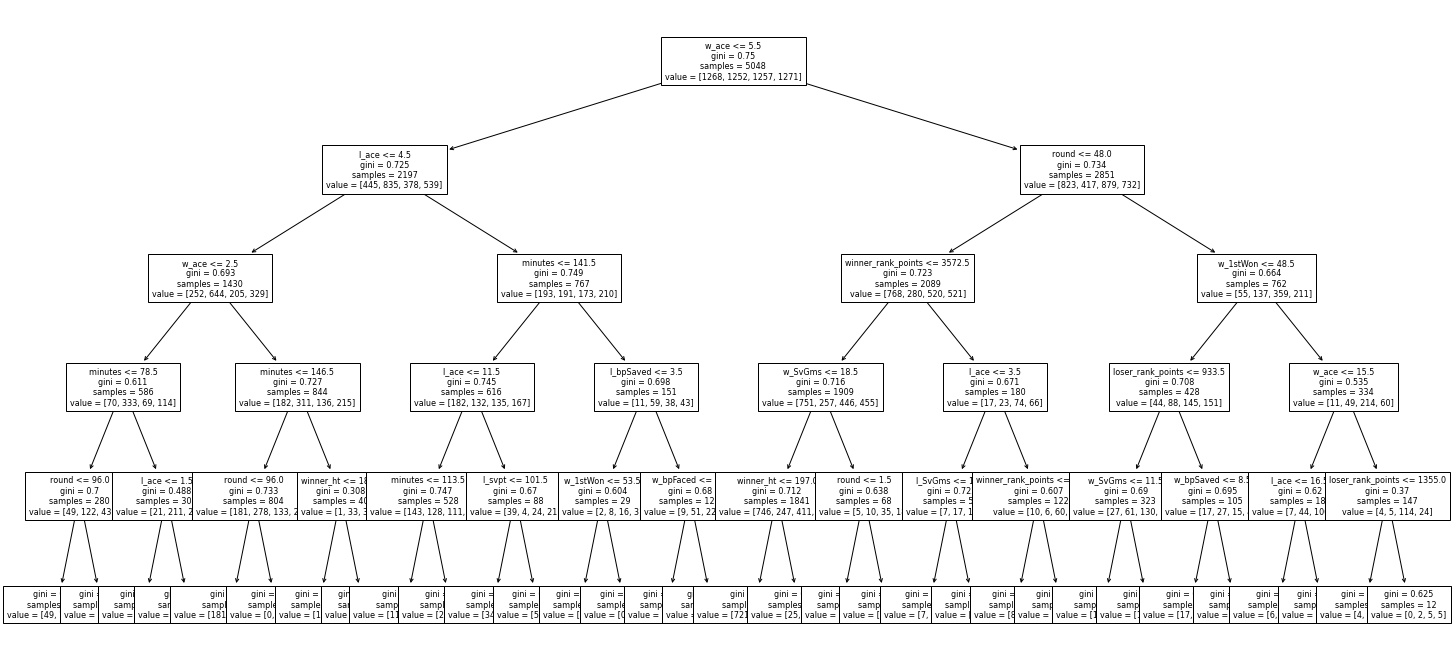

In [13]:
plt.figure(figsize=(25,12))
tree_plot = tree.plot_tree(best_model, fontsize=8, feature_names = atp.columns)

# Save Confusion Matrix image
FILE_NAME = f"best_depth_{best_model.get_depth()}_tree_{MODEL_TIMESTAMP}"

plt.savefig(TREE_PATH + FILE_NAME, dpi = resolution)

## Confusion Matrix

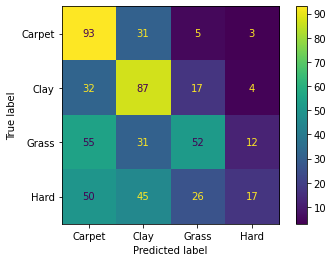

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Save Confusion Matrix image
FILE_NAME = f"best_depth_{best_model.get_depth()}_cm_{MODEL_TIMESTAMP}"

confusion_matrix = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
confusion_matrix.figure_.savefig(CONFUSION_MATRIX_PATH + FILE_NAME, dpi = resolution)

## Classification Report

In [15]:
from sklearn.metrics import classification_report

# Save Classification Report csv
FILE_NAME = f"best_depth_{best_model.get_depth()}_cr_{MODEL_TIMESTAMP}.csv"

y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv(CLASSIFICATION_REPORTS_PATH + FILE_NAME, index= True)
display(report_df)

,precision,recall,f1-score,support
Carpet,0.409396,0.462121,0.434164,132.00
Clay,0.492857,0.492857,0.492857,140.00
Grass,0.507143,0.473333,0.489655,150.00
Hard,0.389313,0.369565,0.379182,138.00
accuracy,0.450000,0.450000,0.450000,0.45
macro avg,0.449677,0.449469,0.448965,560.00
weighted avg,0.451494,0.450000,0.450152,560.00


# Decision Tree with GridSearch

Buscar los mejores parámetros mediante el método ´GridSearch´

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X = atp
y = labels

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('dec_tree', dec_tree)])

n_components = list(range(1, X.shape[1]+1, 1))

criterion = ['gini', 'entropy']
max_depth = depths

parameters = dict(pca__n_components = n_components,
                  dec_tree__criterion = criterion,
                  dec_tree__max_depth = max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

best_criterion = clf_GS.best_estimator_.get_params()['dec_tree__criterion']
best_max_depth = clf_GS.best_estimator_.get_params()['dec_tree__max_depth'] 

print('Best Criterion:', best_criterion)
print('Best max_depth:', best_max_depth)
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(clf_GS.best_estimator_.get_params()['dec_tree'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn import tree

splits = 10

cv = KFold(n_splits = splits, shuffle = True)

best_accuracy = 0

mean_score = 0.0
for train_index, test_index in cv.split(atp):

    x_train, y_train = atp.iloc[train_index], labels.iloc[train_index]
    x_test, y_test   = atp.iloc[test_index],  labels.iloc[test_index]

    model = DecisionTreeClassifier(criterion = best_criterion,
                                   max_depth = best_max_depth)
    model.fit(x_train, y_train)

    accuracy = model.score(x_test,y_test)

    mean_score = mean_score + accuracy


mean_score = mean_score/splits

print("Mean: ", mean_score)
print("Done!")

## Tree plot

In [ ]:
plt.figure(figsize=(25,12))  # set plot size (denoted in inches)
tree_plot = tree.plot_tree(best_model, fontsize=8, feature_names = atp.columns)

# Save Confusion Matrix image
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_tree_{MODEL_TIMESTAMP}"

plt.savefig(TREE_PATH + FILE_NAME, dpi = resolution)

## Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Save Confusion Matrix image
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_cm_{MODEL_TIMESTAMP}"

confusion_matrix = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
confusion_matrix.figure_.savefig(CONFUSION_MATRIX_PATH + FILE_NAME, dpi = resolution)

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Save Classification Report csv
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_cr_{MODEL_TIMESTAMP}.csv"

y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv(CLASSIFICATION_REPORTS_PATH + FILE_NAME, index= True)
display(report_df)